**🔧 Tackling Convergence Issues in Gradient Descent: A Journey from Scratch**  
*Exploring backpropagation and custom adaptive learning rates in linear regression*  

---

Three days ago, I decided to implement a **forward pass** from scratch. But it didn’t feel complete without **backpropagation**. I started with a simple linear function without an intercept:  
**f(x) = kx**, and used gradient descent to find the slope. It was pretty straightforward, so I added an intercept: **f(x) = kx + b**. However, something unexpected happened that took me quite a bit of time to figure out and solve. 🤔

### 🔍 The Problem:  
I noticed that the convergence times of the parameters were drastically different—while **k** converged in the first 10 iterations, **b** required over 1000 iterations to converge! At first, this was puzzling. 🤨  
Initially, when there was only one parameter, the loss function (MSE) depended fully on that parameter. But once we introduced the second parameter, the loss function depended on both **k** and **b**. As the gradient of one parameter updated, it also influenced the gradient of the other.

### 💡 The Insight:  
It became clear that **k** has a stronger relationship to the linear function than **b**—this became apparent in the gradient calculation process.  
Additionally, the loss function’s shape for linear functions is parabolic. As the parameters approach the minimum, the updates become smaller, so while **k** converges quickly, **b** receives smaller updates as the loss reduces.

### 🚀 The Solution:  
That’s when I realized the true value of optimizers. If we can’t scale the gradient, why not scale the **learning rate**?  
To keep it simple, I implemented a **custom adaptive learning rate scheduler** that increases the learning rate with each epoch. This allowed **b** to make larger updates, even when its gradient was small.

### 🔧 The Results:  
It’s far from the best solution, but for a simple implementation, it works well (assuming an optimal initial learning rate). Here’s a visual showing the before and after implementation of the algorithm:


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable

In [2]:
def show_history(history: dict):
    """
    Display the training history in a tabular format.

    Args:
        history (dict): A dictionary containing the training history with keys as column names and values as lists of data points.
    """
    # Create a PrettyTable object to display the history 
    table = PrettyTable()
    
    # Add each key and its corresponding values as a column in the table
    for key in history.keys():
        table.add_column(key, history[key])
    
    # Print the table
    print(table)

## Setting the default variables

In [3]:
# Initialize history dictionary to store training data
history = {
    "epoch": [],
    "loss": [],
    "k": [],
    "b": [],
    "k_gradient": [],
    "k_lr": [],
    "b_gradient": [],
    "b_lr": [],
}

# Set target values for k and b
TARGET_K = 3
TARGET_B = 2

# Generate sample data
x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
y = TARGET_K * x + TARGET_B

# Set number of epochs for training
EPOCHS = 100

# Initialize k and b with random values greater than 0
k = np.random.rand() + 0.01
b = np.random.rand() + 0.01

# Set initial learning rates for k and b
initial_k_lr = 0.01
initial_b_lr = 0.01
k_lr = initial_k_lr
b_lr = initial_b_lr

In [4]:
def plot_result(x, y, y_pred, history):
    # Clear and close any existing plots
    plt.cla()
    plt.close("all")
    
    # Create a figure with 2 rows and 3 columns of subplots
    fig, ax = plt.subplots(2, 3, figsize=(16, 8))

    # Plot target vs predicted values
    ax[0, 0].scatter(x, y, label="target")
    ax[0, 0].plot(x, y_pred, label="predict", color="red")
    ax[0, 0].set_xlabel("x")
    ax[0, 0].set_ylabel("y")
    ax[0, 0].legend()
    ax[0, 0].title.set_text("predict vs target")

    # Plot k vs loss
    ax[0, 1].scatter(TARGET_K, 0, s=100, label="target K")
    ax[0, 1].axhline(y=0)
    ax[0, 1].scatter(history["k"], history["loss"], label="k")
    ax[0, 1].set_xlabel("k")
    ax[0, 1].set_ylabel("loss")
    ax[0, 1].legend()
    ax[0, 1].title.set_text("k vs loss")

    # Plot b vs loss
    ax[0, 2].scatter(TARGET_B, 0, s=100, label="target B")
    ax[0, 2].axhline(y=0)
    ax[0, 2].scatter(history["b"], history["loss"], label="b")
    ax[0, 2].set_xlabel("b")
    ax[0, 2].set_ylabel("loss")
    ax[0, 2].legend()
    ax[0, 2].title.set_text("b vs loss")

    # Plot loss vs epoch
    ax[1, 0].axhline(y=0, label="0 loss")
    ax[1, 0].plot(history["loss"], history["epoch"], label=f"Loss:\n{history['loss'][-1]:.4f}", color="red")
    ax[1, 0].set_xlabel("loss")
    ax[1, 0].set_ylabel("epoch")
    ax[1, 0].legend()
    ax[1, 0].title.set_text("loss vs epoch")

    # Plot k gradient vs epoch
    ax[1, 1].scatter(EPOCHS, 0, s=100, label="0 gradient")
    ax[1, 1].axhline(y=0)
    ax[1, 1].scatter(history["epoch"], history["k_gradient"], label="k gradient")
    ax[1, 1].set_xlabel("epoch")
    ax[1, 1].set_ylabel("k gradient")
    ax[1, 1].legend()
    ax[1, 1].title.set_text("k gradient vs epoch")

    # Plot b gradient vs epoch
    ax[1, 2].scatter(EPOCHS, 0, s=100, label="0 gradient")
    ax[1, 2].axhline(y=0)
    ax[1, 2].scatter(history["epoch"], history["b_gradient"], label="b gradient")
    ax[1, 2].set_xlabel("epoch")
    ax[1, 2].set_ylabel("b gradient")
    ax[1, 2].legend()
    ax[1, 2].title.set_text("b gradient vs epoch")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


# WITHOUT using an Optimizer

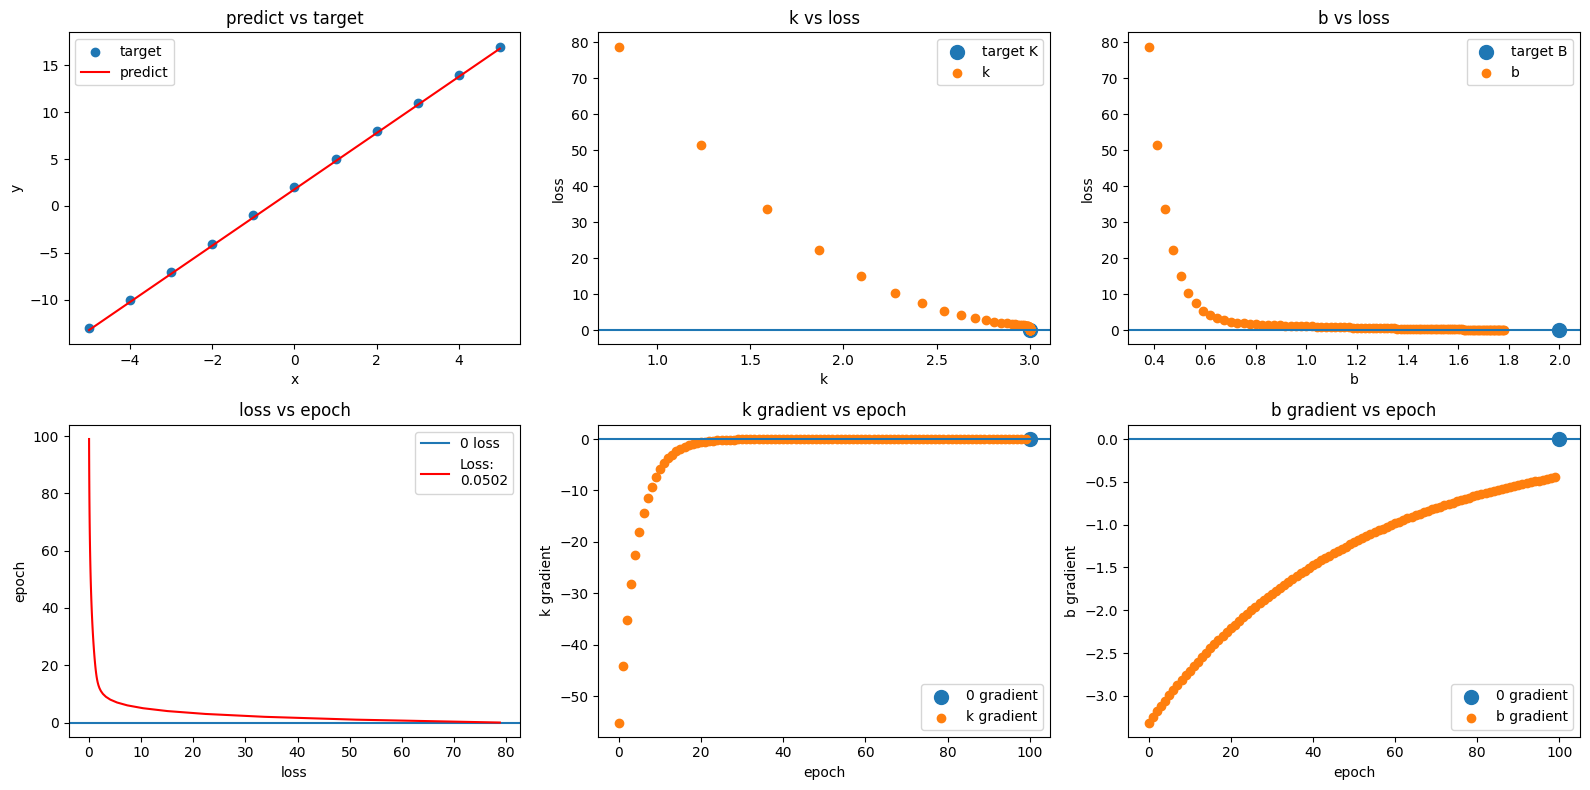

In [5]:
for epoch in range(EPOCHS):
    # Predict y values using the current values of k and b
    y_pred = k * x + b

    # Calculate the mean squared error loss
    loss = np.mean((y_pred - y) ** 2)

    # Calculate the errors
    errors = y_pred - y

    # Calculate the gradients for k and b
    k_gradient = (2 / len(x)) * np.dot(errors, x)
    b_gradient = (2 / len(x)) * np.sum(errors)

    # Update k and b using the gradients and learning rates
    k = k - k_gradient * k_lr
    b = b - b_gradient * b_lr

    # Store the current epoch's data in the history dictionary
    history["epoch"].append(epoch)
    history["k"].append(k)
    history["b"].append(b)
    history["loss"].append(loss)
    history["k_gradient"].append(k_gradient)
    history["k_lr"].append(k_lr)
    history["b_gradient"].append(b_gradient)
    history["b_lr"].append(b_lr)

# Plot the results
plot_result(x, y, y_pred, history)


In [6]:
print(f"Target K: {TARGET_K}, K: {k}")
print(f"Target B: {TARGET_B}, B: {b}")

Target K: 3, K: 2.999999999438322
Target B: 2, B: 1.7804679362776445


In [7]:
# show_history(history)

# WITH an optmizer 
### (Custom Adaptive Learning Rare Scheduler)

In [8]:
# Initialize history dictionary to store training data
history = {
    "epoch": [],
    "loss": [],
    "k": [],
    "b": [],
    "k_gradient": [],
    "k_lr": [],
    "b_gradient": [],
    "b_lr": [],
}

# Set target values for k and b
TARGET_K = 3
TARGET_B = 2

# Generate sample data
x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
y = TARGET_K * x + TARGET_B

# Set number of epochs for training
EPOCHS = 100

# Initialize k and b with random values greater than 0
k = np.random.rand() + 0.01
b = np.random.rand() + 0.01

# Set initial learning rates for k and b
initial_k_lr = 0.01
initial_b_lr = 0.01
k_lr = initial_k_lr
b_lr = initial_b_lr

In [9]:
class LRScheduler:
    """
    A simple learning rate scheduler that adapts the learning rate over epochs.
    
    Args:
        initial_lr (float): The initial learning rate.
    """
    def __init__(self, initial_lr: float):
        self.initial_lr = initial_lr
        self.lr = initial_lr

    def step(self, epoch: int):
        """
        Update the learning rate based on the current epoch.
        
        Args:
            epoch (int): The current epoch number.
        
        Returns:
            float: The updated learning rate.
        """
        # Update the learning rate using a simple decay formula
        self.lr = self.initial_lr / (1 - 0.01 * epoch)
        return self.lr

# Initialize the learning rate scheduler with the initial learning rate for k
lr_scheduler = LRScheduler(initial_k_lr)

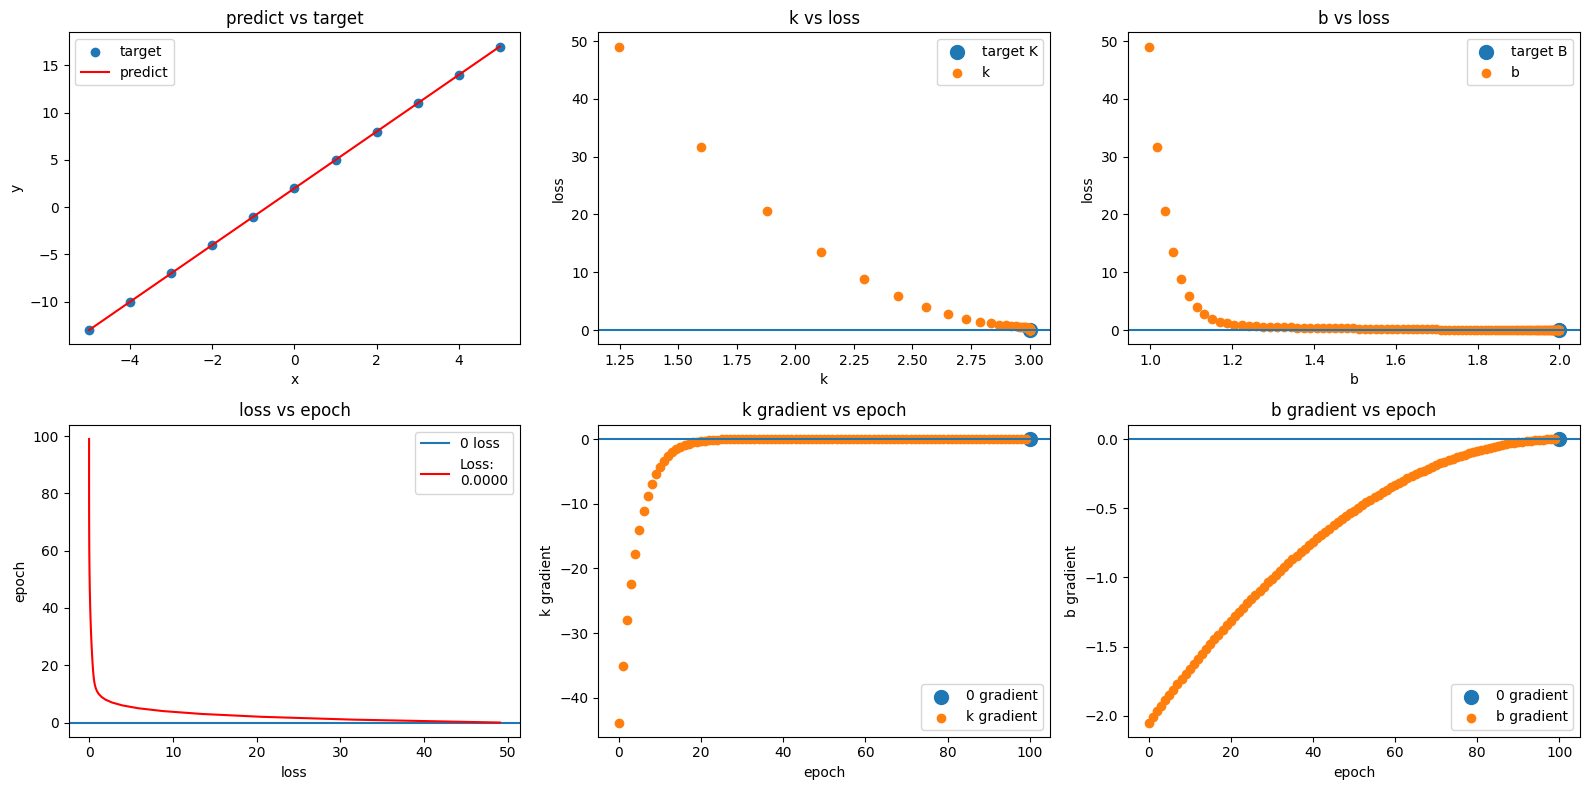

In [10]:
for epoch in range(EPOCHS):
    # Predict y values using the current values of k and b
    y_pred = k * x + b

    # Calculate the mean squared error loss
    loss = np.mean((y_pred - y) ** 2)

    # Calculate the errors
    errors = y_pred - y

    # Calculate the gradients for k and b
    k_gradient = (2 / len(x)) * np.dot(errors, x)
    b_gradient = (2 / len(x)) * np.sum(errors)

    # Update k and b using the gradients and learning rates
    k = k - k_gradient * k_lr
    b = b - b_gradient * b_lr

    # Update the learning rates using the learning rate scheduler
    k_lr = lr_scheduler.step(epoch)
    b_lr = lr_scheduler.step(epoch)

    # Store the current epoch's data in the history dictionary
    history["epoch"].append(epoch)
    history["k"].append(k)
    history["b"].append(b)
    history["loss"].append(loss)
    history["k_gradient"].append(k_gradient)
    history["k_lr"].append(k_lr)
    history["b_gradient"].append(b_gradient)
    history["b_lr"].append(b_lr)

# Plot the results
plot_result(x, y, y_pred, history)

In [11]:
print(f"Target K: {TARGET_K}, K: {k}")
print(f"Target B: {TARGET_B}, B: {b}")

Target K: 3, K: 2.999999999999888
Target B: 2, B: 1.9999999999999998


In [12]:
# show_history(history)